## Week 3: Gradients and Optimization

### Outline
- Gradient descent
- Stochasticity, the explore-exploit tradeoff, global vs. local
- Numerical vs. analytic vs. automatic differentiation
- Automatic differentiation and machine learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.)
sns.set_style('white')

### Gradient Descent


- Falling down a parabola deterministically
- Local minima: falling down the wrong side of a quartic
- Stochasticity and "tunneling"
- Multiple dimensions: fastest descent = gradient; Wiki image
- Real situations (can't analytically solve for minima)
- The parabola is the cost function, not the generating function! The generating function can have arbitrarily complex inputs and outputs. Cost functions map arbitrarily complex inputs to scalars.

$$L(\theta) = \theta^2$$

In [20]:
def loss(theta):
    loss = theta ** 2
    return loss

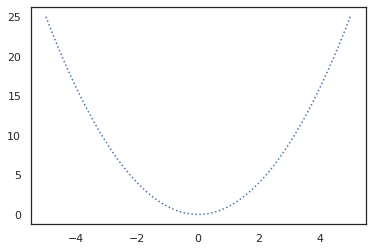

In [21]:
bounds = (-5, 5)
N_plot = 100

theta_plot = np.linspace(*bounds, N_plot)
loss_plot = loss(theta_plot)

plt.plot(theta_plot, loss_plot, ':')
plt.show()

It's pretty obvious what the minimum is, and we can solve it analytically with almost no effort.

\begin{align}
\frac{dL}{d\theta} &= 2\theta \\
0 &= 2\theta \\
0 &= \theta
\end{align}

In [35]:
def loss_d(theta):
    loss_d = 2 * theta
    return loss_d

Let's say we can't solve it by setting to 0 (usually true), and assume it's too costly to check every possible grid point (curse of dimensionality!), e.g. choose the minimum in `loss_plot` after evaluating at `N_plot` points.

Often we have an initial estimate for the value of the parameter, and can calculate the loss function and the derivative of the loss function at that point.

## TODO: direction of tangent

In [39]:
def tangent(theta, width=0.5, N=25):
    theta_r = np.linspace(theta - width, theta + width, N)
    m = loss_d(theta)
    b = loss(theta) - m * theta
    def line(theta):
        return m * theta + b
    return theta_r, line(theta_r)

Derivative of loss: 8


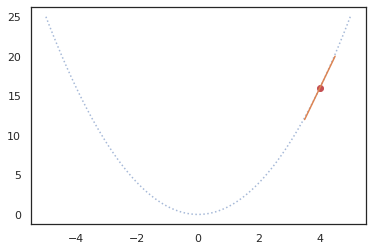

In [74]:
theta_0 = 4  # starting point
loss_0 = loss(theta_0)
print("Derivative of loss: {}".format(loss_d(theta_0)))

plt.plot(theta_plot, loss_curve, ':', alpha=0.5)
plt.plot(theta_0, loss_0, 'ro')  
plt.plot(*tangent(theta_0))
plt.show()

The derivative at this point is 8. This is positive, if we move in the direction of positive $\theta$, the loss will increase, which is the opposite of what we want. 

By negating the derivative, its sign corresponds to the desired $\theta$ direction. In this case, -8 is negative, which means "move in the negative $\theta$ direction". But by how much? Say we move by -8. 

<img src='./img/tangent-1.png'>

Our new position is $\theta=-4$, and the derivative is -8. Clearly if we move by $\Delta\theta=-(-8)=+8$, we'll be back where we started. Unless we take smaller steps, we'll never reach the minimum. 

There is no obvious connection between the magnitude of the derivative and the magnitude of the step we should take. Consider that if the loss has units $[L]$ and $\theta$ has units $[\theta]$, the derivative of the loss has units $[L]/[\theta]$, which are not additive with units of $[\theta]$. The sign tells us what direction to take to find the minimum, but not how far to go. That is usually unknown.

Therefore, to control how far to move, we take steps of $\eta\frac{dL}{d\theta}$, where $\eta$ is the factor (called the *learning rate*) by which we scale the derivative to calculate our step size. 

In this case, it seems reasonable to choose a value $0<\eta<1$. Let's say we start at our original point and choose $\eta=0.25$. (In this case $\eta=0.5$ is optimal since a step size of $0.5(8)=4$ will land us right on the minimum---but we don't normally have this information!)

In [60]:
learn_rate = 0.25

Our update rule is:
$$\theta_{n+1}=\theta_n - \eta\frac{dL}{d\theta}$$

In [61]:
def update_theta(theta, learn_rate): 
    theta = theta - learn_rate * loss_d(theta)  # participant
    return theta

In [97]:
# start the iterations (steps) at our original estimate
theta = theta_0
loss_after = loss_0

Derivative of loss at $	heta=1.0$: 2.0
Change in loss across step: -3.0


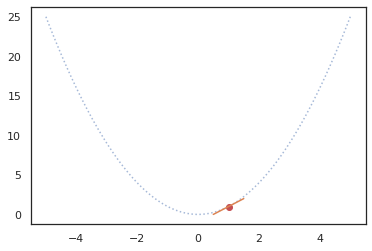

In [99]:
# single step per cell execution
loss_before = loss_after
theta = update_theta(theta, learn_rate)  
loss_after = loss(theta)

loss_change = loss_after - loss_before

print("Derivative of loss at $\theta={}$: {}".format(theta, loss_d(theta)))
print("Change in loss across step: {}".format(loss_change))

plt.plot(theta_plot, loss_curve, ':', alpha=0.5)
plt.plot(theta, loss_after, 'ro')
plt.plot(*tangent(theta))

This is Zeno's paradox. We'll never quite reach the minimum (at a constant learning rate), but we can get close enough for any practical purpose.

### Local minima

In [140]:
def loss(theta):
    loss = (0.9 * theta**4) + (4 * theta**3) + (5.7 * theta**2) + (3 * theta)
    return loss

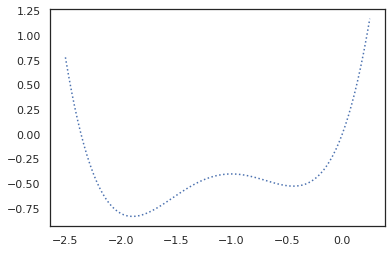

In [141]:
bounds = (-2.5, 0.25)
N_plot = 100

theta_plot = np.linspace(*bounds, N_plot)
loss_plot = loss(theta_plot)

plt.plot(theta_plot, loss_plot, ':')
plt.show()

In [ ]:
TODO: getting trapped

How to solve?
- Increase learning rate. But won't help in this case! (Step large enough to jump out is also large enough to jump back in, so the global minimum is not stably optimized.)
- Stochasticity. Add some uncertainty to the optimization.
- Learning rate tradeoff: too small = too long; too large = too variable/higher final error
- (Speed-accuracy tradeoff)

In [ ]:
### Multidimensional case
- Typical
    - Curse of dimensionality: Usually easy to check the entire range in the 1D case.
- Gradient instead of derivative: 
    - Extension of reasoning about signs (moving down a hyperplane)
    - *Relative* magnitudes of different parts of the gradient matter.

### Stochastic gradient descent
- Use subsets of dataset rather than full dataset
- Approximation of "true" gradient

### Types of differentiation
#### Analytic
As above.
#### Numerical
Finite differences etc.
#### Automatic
Chain rule. Connection to backprop?